In [2]:
import pandas as pd

# Step 1: Read the file
file_path = '/home/sr933/rcc/data/h.all.v2024.1.Hs.symbols.gmt'  # Replace with your actual file path
df = pd.read_csv(file_path, delimiter='\t')

# Step 2: Remove the second column
df = df.drop(df.columns[1], axis=1)  # Drop the second column (index 1)

# Step 3: Transpose the DataFrame (flip rows and columns)
transposed_df = df.T

# Step 4: Set the first column (original DataFrame's first column) as the new column names
transposed_df.columns = df[df.columns[0]].values  # Set the new column names to the first column's values

# Step 5: Reset index of transposed DataFrame (to avoid the original index)
transposed_df.reset_index(drop=True, inplace=True)
transposed_df = transposed_df.drop(transposed_df.index[0])
transposed_df.reset_index(drop=True, inplace=True)
# Step 6: Show the transposed DataFrame (optional)



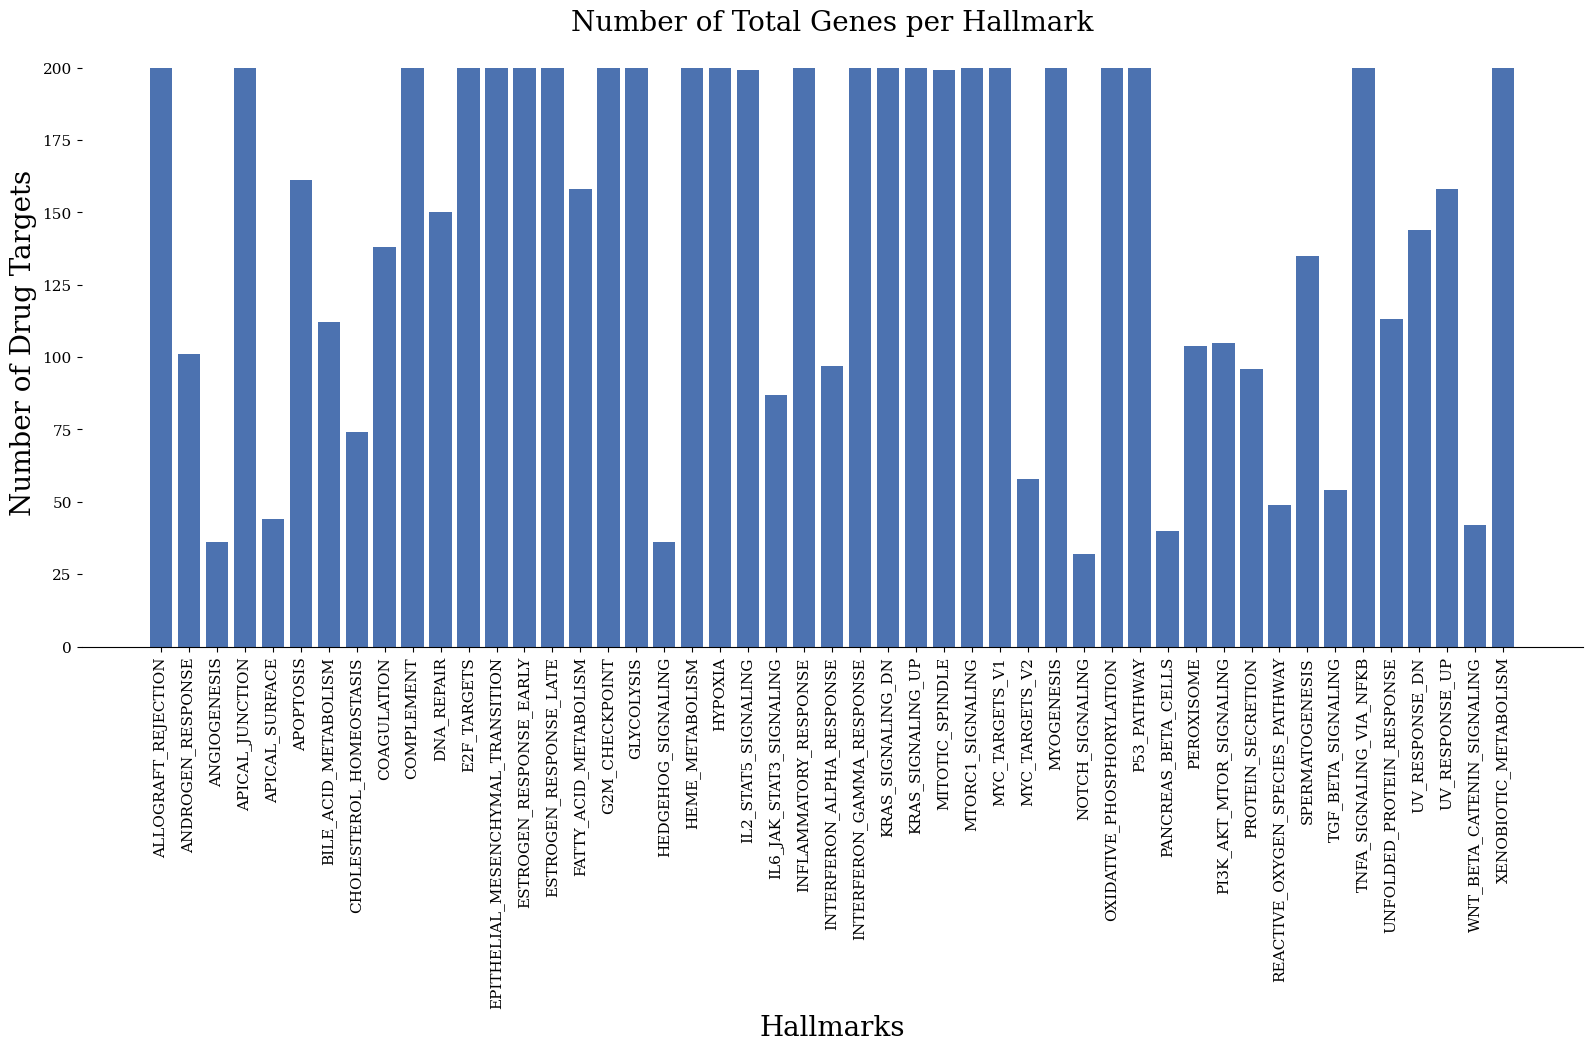

In [23]:
import matplotlib.pyplot as plt


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use(["default"])
params = {
    "ytick.color": "black",
    "xtick.color": "black",
    "axes.labelcolor": "black",
    "axes.edgecolor": "black",
    "text.usetex": False,
    "font.family": "serif",
    "font.sans-serif": "Helvetica",
}
colors = sns.color_palette("deep")
plt.rcParams.update(params)
# Load the CSV file
df = pd.read_csv('/home/sr933/rcc/data/Target_genes.csv')

# Convert the 'Genes' column to a list
target_genes = df['Genes'].tolist()

target_genes_count = {}

# Iterate through each column (hallmark) in transposed_df
for hallmark in transposed_df.columns:
    # Get the genes for the current hallmark (non-null values in that column)
    hallmark_genes = transposed_df[hallmark].dropna().tolist()
    
    # Count how many of the target genes are in the current hallmark's genes
    count =  transposed_df[hallmark].count()
    target_genes_count[hallmark] = count

# Remove "HALLMARK_" prefix from hallmark names
cleaned_labels = [hallmark.replace("HALLMARK_", "") for hallmark in target_genes_count.keys()]

# Step 3: Create a bar plot
fig, ax = plt.subplots(figsize=(16, 10))
plt.bar(cleaned_labels, target_genes_count.values(), color=colors[0])

# Customize the plot

plt.xlabel('Hallmarks', fontsize=20)
plt.ylabel('Number of Drug Targets', fontsize=20)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.yaxis.set_ticks_position("left")
ax.xaxis.set_ticks_position("bottom")
plt.title('Number of Total Genes per Hallmark', fontsize=20)
ax.tick_params(axis="x", labelsize=11)
ax.tick_params(axis="y", labelsize=11)
# Show the plot
save_path = "/home/sr933/output/all_genes_per_hallmark.svg"  # Replace with your desired file path
plt.savefig(save_path, format="svg", bbox_inches="tight")



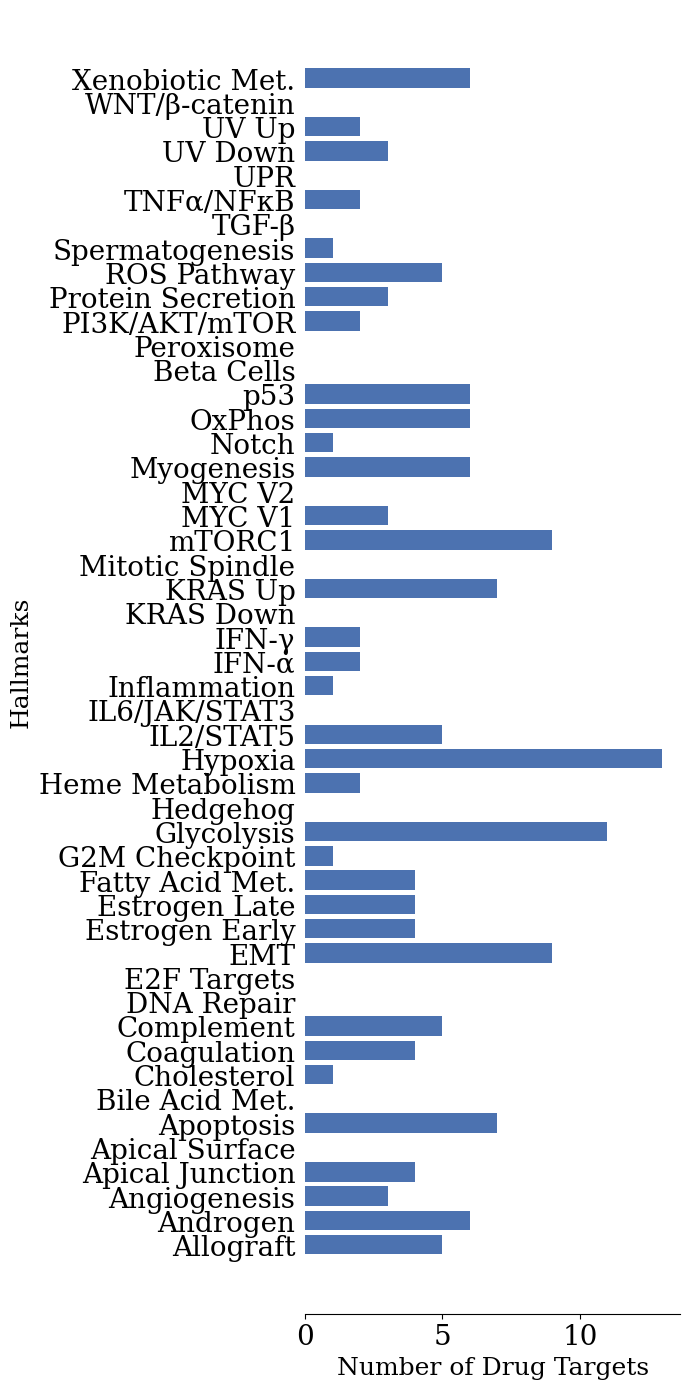

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use(["default"])

hallmark_label_map = {
    "HALLMARK_ALLOGRAFT_REJECTION": "Allograft",
    "HALLMARK_ANDROGEN_RESPONSE": "Androgen",
    "HALLMARK_ANGIOGENESIS": "Angiogenesis",
    "HALLMARK_APICAL_JUNCTION": "Apical Junction",
    "HALLMARK_APICAL_SURFACE": "Apical Surface",
    "HALLMARK_APOPTOSIS": "Apoptosis",
    "HALLMARK_BILE_ACID_METABOLISM": "Bile Acid Met.",
    "HALLMARK_CHOLESTEROL_HOMEOSTASIS": "Cholesterol",
    "HALLMARK_COAGULATION": "Coagulation",
    "HALLMARK_COMPLEMENT": "Complement",
    "HALLMARK_DNA_REPAIR": "DNA Repair",
    "HALLMARK_E2F_TARGETS": "E2F Targets",
    "HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION": "EMT",
    "HALLMARK_ESTROGEN_RESPONSE_EARLY": "Estrogen Early",
    "HALLMARK_ESTROGEN_RESPONSE_LATE": "Estrogen Late",
    "HALLMARK_FATTY_ACID_METABOLISM": "Fatty Acid Met.",
    "HALLMARK_G2M_CHECKPOINT": "G2M Checkpoint",
    "HALLMARK_GLYCOLYSIS": "Glycolysis",
    "HALLMARK_HEDGEHOG_SIGNALING": "Hedgehog",
    "HALLMARK_HEME_METABOLISM": "Heme Metabolism",
    "HALLMARK_HYPOXIA": "Hypoxia",
    "HALLMARK_IL2_STAT5_SIGNALING": "IL2/STAT5",
    "HALLMARK_IL6_JAK_STAT3_SIGNALING": "IL6/JAK/STAT3",
    "HALLMARK_INFLAMMATORY_RESPONSE": "Inflammation",
    "HALLMARK_INTERFERON_ALPHA_RESPONSE": "IFN-α",
    "HALLMARK_INTERFERON_GAMMA_RESPONSE": "IFN-γ",
    "HALLMARK_KRAS_SIGNALING_DN": "KRAS Down",
    "HALLMARK_KRAS_SIGNALING_UP": "KRAS Up",
    "HALLMARK_MITOTIC_SPINDLE": "Mitotic Spindle",
    "HALLMARK_MTORC1_SIGNALING": "mTORC1",
    "HALLMARK_MYC_TARGETS_V1": "MYC V1",
    "HALLMARK_MYC_TARGETS_V2": "MYC V2",
    "HALLMARK_MYOGENESIS": "Myogenesis",
    "HALLMARK_NOTCH_SIGNALING": "Notch",
    "HALLMARK_OXIDATIVE_PHOSPHORYLATION": "OxPhos",
    "HALLMARK_P53_PATHWAY": "p53",
    "HALLMARK_PANCREAS_BETA_CELLS": "Beta Cells",
    "HALLMARK_PEROXISOME": "Peroxisome",
    "HALLMARK_PI3K_AKT_MTOR_SIGNALING": "PI3K/AKT/mTOR",
    "HALLMARK_PROTEIN_SECRETION": "Protein Secretion",
    "HALLMARK_REACTIVE_OXYGEN_SPECIES_PATHWAY": "ROS Pathway",
    "HALLMARK_SPERMATOGENESIS": "Spermatogenesis",
    "HALLMARK_TGF_BETA_SIGNALING": "TGF-β",
    "HALLMARK_TNFA_SIGNALING_VIA_NFKB": "TNFα/NFκB",
    "HALLMARK_UNFOLDED_PROTEIN_RESPONSE": "UPR",
    "HALLMARK_UV_RESPONSE_DN": "UV Down",
    "HALLMARK_UV_RESPONSE_UP": "UV Up",
    "HALLMARK_WNT_BETA_CATENIN_SIGNALING": "WNT/β-catenin",
    "HALLMARK_XENOBIOTIC_METABOLISM": "Xenobiotic Met."
}



params = {
    "ytick.color": "black",
    "xtick.color": "black",
    "axes.labelcolor": "black",
    "axes.edgecolor": "black",
    "text.usetex": False,
    "font.family": "serif",
    "font.sans-serif": "Helvetica",
}
colors = sns.color_palette("deep")
plt.rcParams.update(params)
# Load the CSV file
df = pd.read_csv('/home/sr933/rcc/data/Target_genes.csv')

# Convert the 'Genes' column to a list
target_genes = df['Genes'].tolist()

target_genes_count = {}

# Iterate through each column (hallmark) in transposed_df
for hallmark in transposed_df.columns:
    # Get the genes for the current hallmark (non-null values in that column)
    hallmark_genes = transposed_df[hallmark].dropna().tolist()
    
    # Count how many of the target genes are in the current hallmark's genes
    count = sum(1 for gene in target_genes if gene in hallmark_genes)
    target_genes_count[hallmark] = count

# Remove "HALLMARK_" prefix from hallmark names
cleaned_labels = [hallmark_label_map.get(h, h) for h in target_genes_count.keys()]


# Step 3: Create a bar plot
# Step 3: Create a horizontal bar plot (flipped axes)
fig, ax = plt.subplots(figsize=(7, 14))  # Narrow width, tall height
ax.barh(cleaned_labels, target_genes_count.values(), color=colors[0])

# Customize appearance
ax.set_xlabel('Number of Drug Targets', fontsize=18)
ax.set_ylabel('Hallmarks', fontsize=18)
#ax.set_title('Number of Drug Targets per Hallmark', fontsize=20, pad=15)

# Aesthetics
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.xaxis.set_ticks_position("bottom")
ax.yaxis.set_ticks_position("none")  # Optional: hide hallmark tick lines
ax.tick_params(axis="x", labelsize=20)
ax.tick_params(axis="y", labelsize=20)

# Layout and save
plt.tight_layout()
save_path = "/home/sr933/output/genes_per_hallmark.png"
plt.savefig(save_path, format="png", bbox_inches="tight", dpi=900)
plt.show()



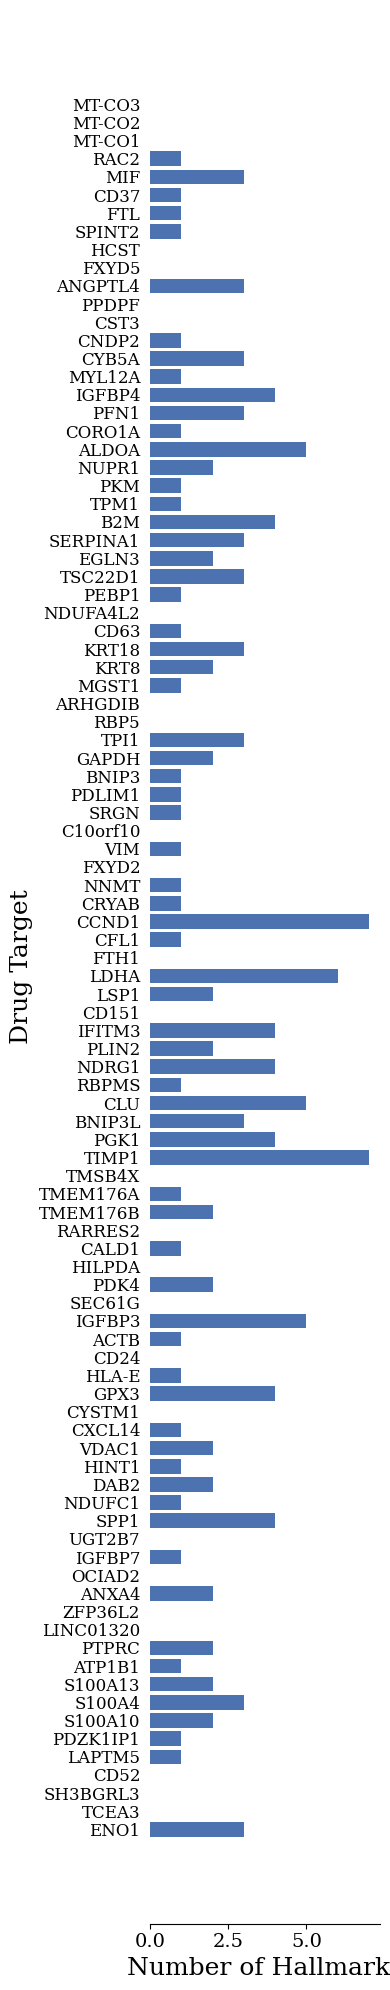

In [13]:
gene_hallmark_count = {}

# Iterate through each gene in the target genes list
for gene in target_genes:
    # Initialize the count to 0
    count = 0
    
    # Check each hallmark (i.e., each column in transposed_df)
    for hallmark in transposed_df.columns:
        # Get the genes for the current hallmark (non-null values in that column)
        hallmark_genes = transposed_df[hallmark].dropna().tolist()
        
        # Check if the target gene is in the list of hallmark genes
        if gene in hallmark_genes:
            count += 1
            
    gene_hallmark_count[gene] = count

# Sort genes by number of hallmarks (optional but cleaner)
sorted_gene_counts = gene_hallmark_count.copy()

# Create horizontal bar plot (tall, narrow)
fig, ax = plt.subplots(figsize=(4, 20))  # Narrow width, tall height
ax.barh(list(sorted_gene_counts.keys()), list(sorted_gene_counts.values()), color=colors[0])

# Customize appearance
ax.set_xlabel('Number of Hallmarks', fontsize=18)
ax.set_ylabel('Drug Target', fontsize=18)
#ax.set_title('Number of Hallmarks per Drug Target', fontsize=20, pad=15)

# Aesthetics
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.xaxis.set_ticks_position("bottom")
ax.yaxis.set_ticks_position("none")
ax.tick_params(axis="x", labelsize=14)
ax.tick_params(axis="y", labelsize=12)

plt.tight_layout()
save_path = "/home/sr933/output/hallmark_per_gene.png"
plt.savefig(save_path, format="png", bbox_inches="tight", dpi=900)
plt.show()
